In [ ]:

!pip install pandas fiona shapely pyproj rtree numpy mapclassify libpysal

!pip install --upgrade geopandas

!pip install git+git://github.com/geopandas/geopandas.git

!git clone https://github.com/geopandas/geopandas.git
!cd geopandas
!pip install





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-t_dqebg7
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-t_dqebg7
ERROR: Operation cancelled by user
fatal: destination path 'geopandas' already exists and is not an empty directory.
Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  F

In [ ]:

# import relevant packages
import geopandas as gpd
from geopandas import read_file
import pandas as pd
import matplotlib.pyplot as plt




In [ ]:
!pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline
import geopandas as gpd
import numpy as np
from scipy import ndimage

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = 8, 6

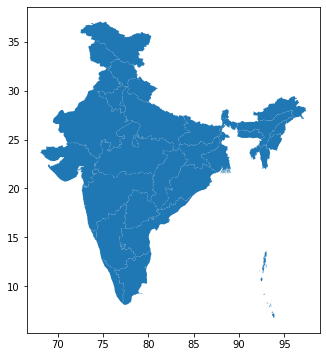

In [ ]:
pts = gpd.GeoDataFrame.from_file('/content/Admin2.shp')
pts.plot()


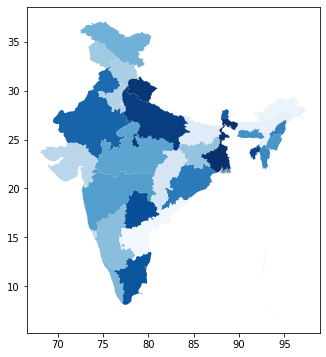

In [ ]:
pts.plot("ST_NM", cmap="Blues") 

In [ ]:
data = gpd.GeoDataFrame.from_file('/content/RBI DATA states_wise_population_Income.csv')
#data = gpd.read_file("/content/RBI DATA states_wise_population_Income.csv")
data.head()

States_Union Territories 2000-01-INC 2011-12-INC 2001 - LIT 2011- LIT  \
0  Andaman and Nicobar Islands       25047       89642       81.3     86.63   
1               Andhra Pradesh       17195       64773      60.47     67.02   
2            Arunachal Pradesh       15260       71366      54.34     65.39   
3                        Assam       12803       36320      63.25     72.19   
4                        Bihar        6415       22582         47      61.8   

  2001 - POP 2011- POP 2001 -SEX_Ratio 2011 -SEX_Ratio 2001 -UNEMP  \
0        356       381             846             876          34   
1      76210     84581             978             993           8   
2       1098      1384             893             938           5   
3      26656     31206             935             958          39   
4      82999    104099             919             918          18   

  2011 -UNEMP 2001 -Poverty 2011 -Poverty geometry  
0          54         20.99             1     None  
1          12         15.77           9.2     None  
2          17         33.47         34.67     None  
3          45         36.09         31.98     None  
4          32          42.6         33.74     None

In [ ]:
pop_data=data.rename(columns ={'States_Union Territories':'ST_NM'})

print(pop_data)

                          ST_NM 2000-01-INC 2011-12-INC 2001 - LIT 2011- LIT  \
0   Andaman and Nicobar Islands       25047       89642       81.3     86.63   
1                Andhra Pradesh       17195       64773      60.47     67.02   
2             Arunachal Pradesh       15260       71366      54.34     65.39   
3                         Assam       12803       36320      63.25     72.19   
4                         Bihar        6415       22582         47      61.8   
5                    Chandigarh       49771      136883      81.94     86.05   
6                  Chhattisgarh       10744       48366      64.66     70.28   
7                         Delhi       40678      161446      57.63     76.24   
8                           Goa       43735      211570      78.18      87.1   
9                       Gujarat       18392       85979      81.67     86.21   
10                      Haryana       25583      106320      82.01      88.7   
11             Himachal Pradesh       22

epsg:4326


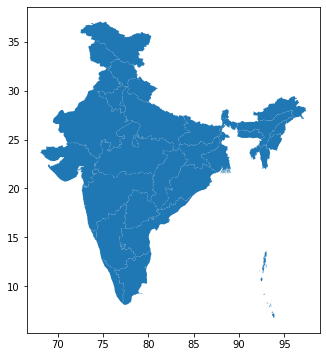

In [ ]:
import folium
import matplotlib.pyplot as plt
import folium
from folium import Figure, Map, Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster


pts.crs

pts = pts.to_crs(epsg=4326)
print(pts.crs)
pts.head()


pts.plot(figsize=(6, 6))
plt.show()


In [ ]:
# Project to NAD83 projected crs
pts = pts.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
pts['centroid'] = pts.centroid

In [ ]:
# Project to WGS84 geographic crs

# geometry (active) column
pts = pts.to_crs(epsg=4326)

# Centroid column
pts['centroid'] = pts['centroid'].to_crs(epsg=4326)

pts.head()

ST_NM                                           geometry  \
0  Arunachal Pradesh  POLYGON ((96.08866 29.45997, 96.09428 29.45477...   
1              Assam  POLYGON ((95.97166 27.96254, 95.97174 27.96227...   
2         Chandigarh  POLYGON ((76.77175 30.79498, 76.77231 30.79420...   
3          Karnataka  POLYGON ((77.32647 18.45884, 77.32648 18.45803...   
4            Manipur  POLYGON ((94.57315 25.69156, 94.57522 25.69094...   

                    centroid  
0  POINT (94.66701 28.03970)  
1  POINT (92.81200 26.35524)  
2  POINT (76.78051 30.72934)  
3  POINT (76.17292 14.65498)  
4  POINT (93.87672 24.73241)

In [ ]:
#spatial join

indiashape = pts[['ST_NM', 'geometry', 'centroid']]
indiashape.head()


ST_NM                                           geometry  \
0  Arunachal Pradesh  POLYGON ((96.08866 29.45997, 96.09428 29.45477...   
1              Assam  POLYGON ((95.97166 27.96254, 95.97174 27.96227...   
2         Chandigarh  POLYGON ((76.77175 30.79498, 76.77231 30.79420...   
3          Karnataka  POLYGON ((77.32647 18.45884, 77.32648 18.45803...   
4            Manipur  POLYGON ((94.57315 25.69156, 94.57522 25.69094...   

                    centroid  
0  POINT (94.66701 28.03970)  
1  POINT (92.81200 26.35524)  
2  POINT (76.78051 30.72934)  
3  POINT (76.17292 14.65498)  
4  POINT (93.87672 24.73241)

In [ ]:

pop_data.head()

ST_NM 2000-01-INC 2011-12-INC 2001 - LIT 2011- LIT  \
0  Andaman and Nicobar Islands       25047       89642       81.3     86.63   
1               Andhra Pradesh       17195       64773      60.47     67.02   
2            Arunachal Pradesh       15260       71366      54.34     65.39   
3                        Assam       12803       36320      63.25     72.19   
4                        Bihar        6415       22582         47      61.8   

  2001 - POP 2011- POP 2001 -SEX_Ratio 2011 -SEX_Ratio 2001 -UNEMP  \
0        356       381             846             876          34   
1      76210     84581             978             993           8   
2       1098      1384             893             938           5   
3      26656     31206             935             958          39   
4      82999    104099             919             918          18   

  2011 -UNEMP 2001 -Poverty 2011 -Poverty geometry  
0          54         20.99             1     None  
1          12         15.77           9.2     None  
2          17         33.47         34.67     None  
3          45         36.09         31.98     None  
4          32          42.6         33.74     None

In [ ]:
india = indiashape.merge(pop_data, on='ST_NM')
india = india[['ST_NM', 'centroid', '2011- POP']]
india.head()

ST_NM                   centroid 2011- POP
0  Arunachal Pradesh  POINT (94.66701 28.03970)      1384
1              Assam  POINT (92.81200 26.35524)     31206
2         Chandigarh  POINT (76.78051 30.72934)      1055
3          Karnataka  POINT (76.17292 14.65498)     61095
4            Manipur  POINT (93.87672 24.73241)      2856

Text(0.5, 1.0, 'India')

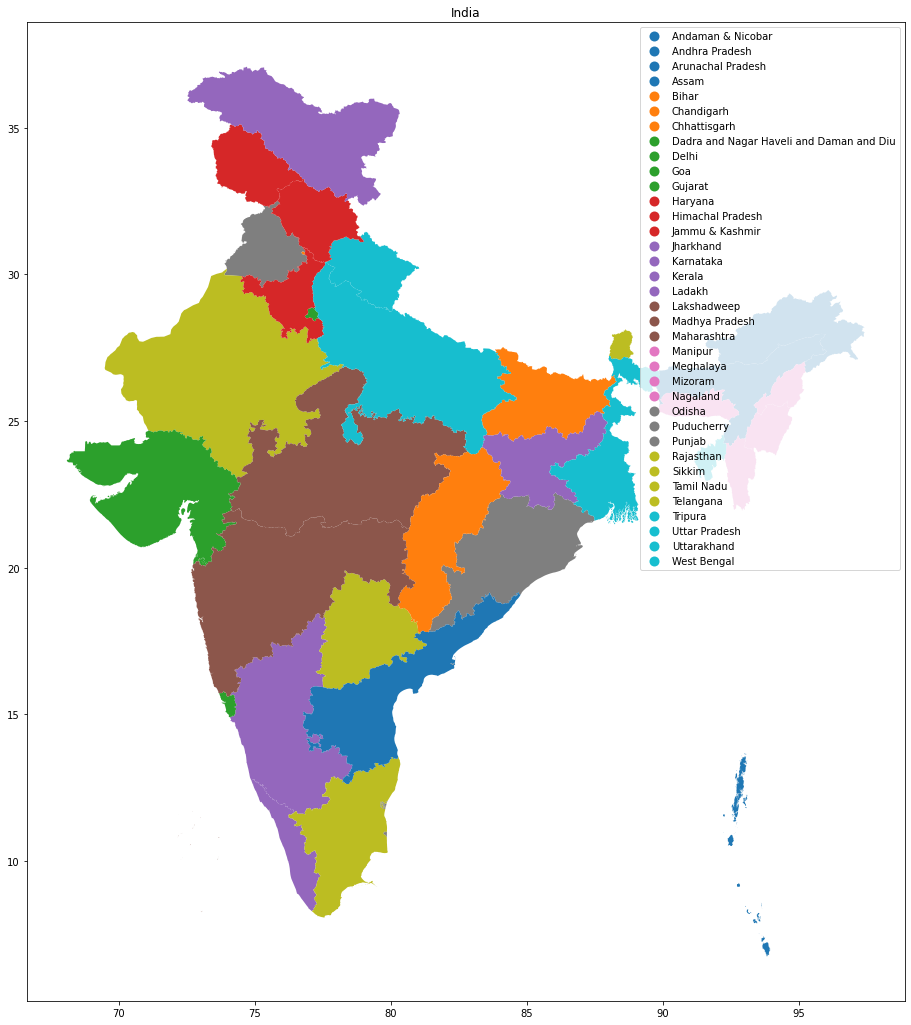

In [ ]:
indiashape.ST_NM.unique()
fig, ax = plt.subplots(figsize=(24, 18))
pop_data.plot(ax=ax, alpha=0.4, color="grey")
indiashape.plot(column="ST_NM", ax=ax, legend=True)
plt.title("India")

In [ ]:
# plot base map
m = folium.Map(location=[23, 78.9629], # center of the folium map
               tiles='cartodbpositron', # type of map
               min_zoom=4, max_zoom=6, # zoom range
               zoom_start=4) # initial zoom



m

In [ ]:
for _, r in pts.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['ST_NM']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:

import pandas as pd
import numpy as np

print(india.dtypes)


ST_NM          object
centroid     geometry
2011- POP      object
dtype: object


In [ ]:
#india['2011- POP'] = india['2011- POP'].fillna(0).astype(int)

print(india.dtypes)

ST_NM          object
centroid     geometry
2011- POP      object
dtype: object


In [ ]:
print(india)

                ST_NM                   centroid 2011- POP
0   Arunachal Pradesh  POINT (94.66701 28.03970)      1384
1               Assam  POINT (92.81200 26.35524)     31206
2          Chandigarh  POINT (76.78051 30.72934)      1055
3           Karnataka  POINT (76.17292 14.65498)     61095
4             Manipur  POINT (93.87672 24.73241)      2856
5           Meghalaya  POINT (91.27804 25.53770)      2967
6             Mizoram  POINT (92.83199 23.30096)      1097
7            Nagaland  POINT (94.46343 26.06102)      1979
8              Punjab  POINT (75.41488 30.83783)     27743
9           Rajasthan  POINT (73.85218 26.56408)     68548
10             Sikkim  POINT (88.47300 27.56886)       611
11            Tripura  POINT (91.73775 23.74321)      3674
12        Uttarakhand  POINT (79.21080 30.15336)     10086
13              Bihar  POINT (85.60887 25.67750)    104099
14             Kerala  POINT (76.42467 10.42399)     33406
15     Madhya Pradesh  POINT (78.27516 23.52957)     726

In [ ]:


from folium import plugins


heat_data = [[point.xy[1][0], point.xy[0][0]] for point in india['centroid']]

heat_data
plugins.HeatMap(heat_data).add_to(m)


m

In [ ]:
! pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests



In [ ]:
from requests import get

ip = get('https://api.ipify.org').text
print('My public IP address is: {}'.format(ip))

My public IP address is: 104.199.191.192


In [ ]:
#data = get('https://ipapi.co/8.8.8.8/json/')
#print(data)

In [ ]:

def get_ip():
    response = requests.get('https://api64.ipify.org?format=json').json()
    return response["ip"]


def get_location():
    ip_address = get_ip()
    response = requests.get(f'https://ipapi.co/{ip_address}/json/').json()
    location_data = {
        "ip": ip_address,
        "city": response.get("city"),
        "region": response.get("region"),
        "country": response.get("country_name")
    }
    return location_data


print(get_location())


{'ip': '104.199.191.192', 'city': 'Taipei', 'region': 'Taipei City', 'country': 'Taiwan'}


104.199.191.192
